# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

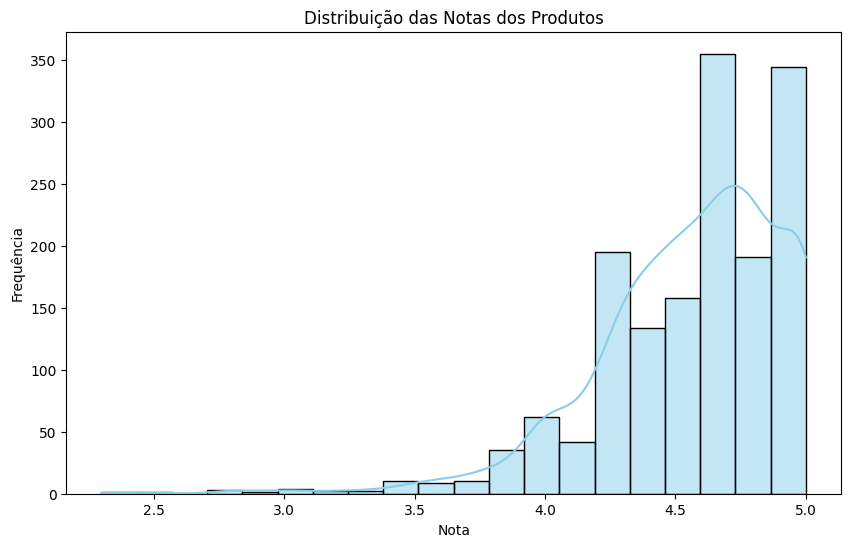

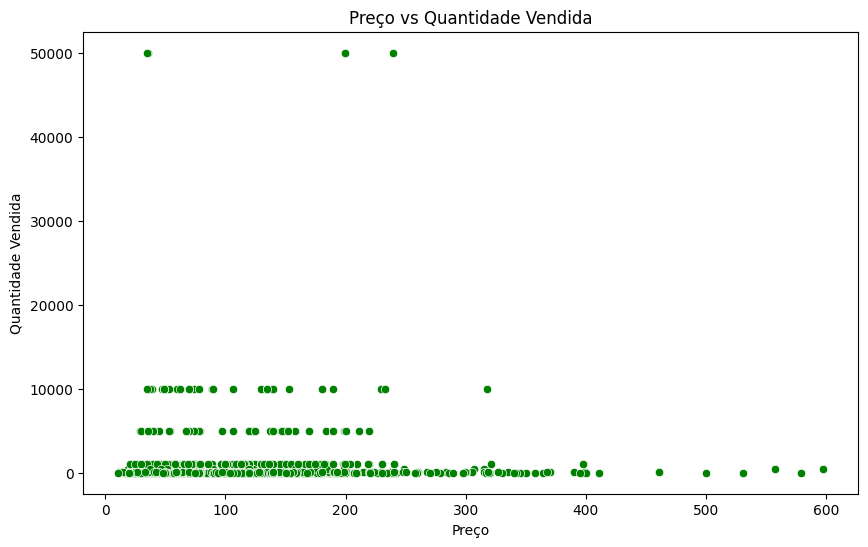

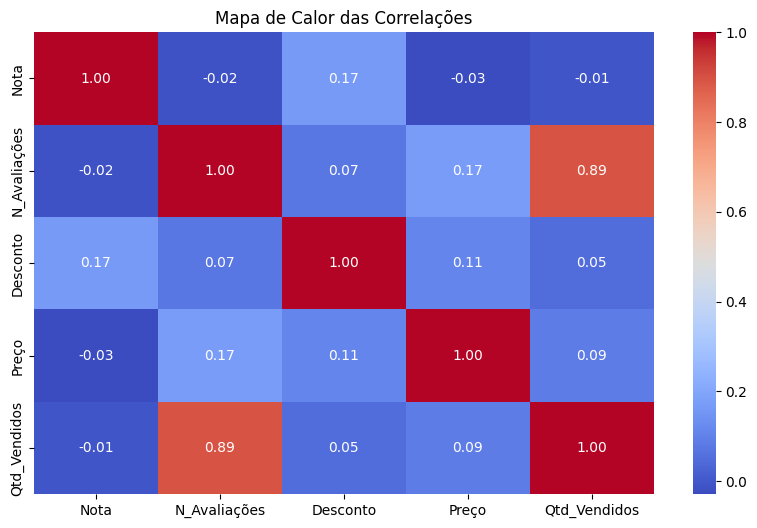

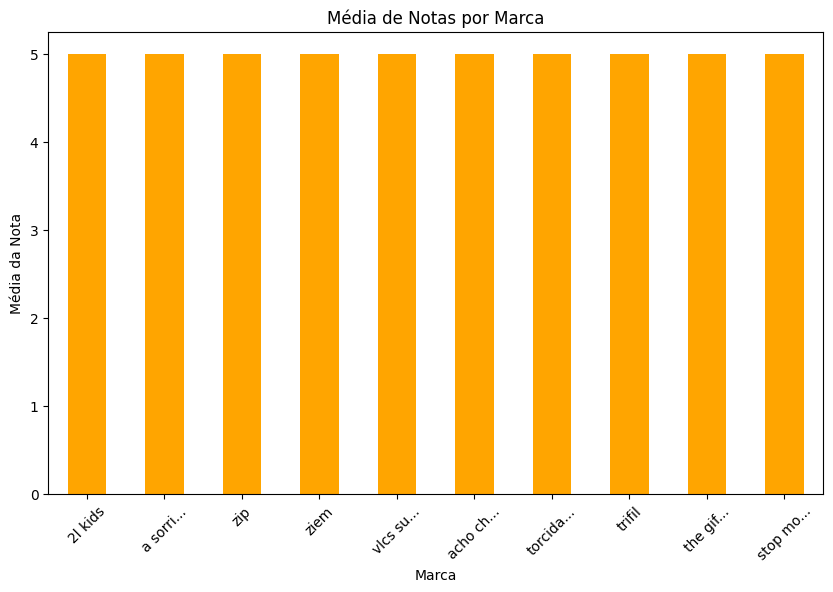

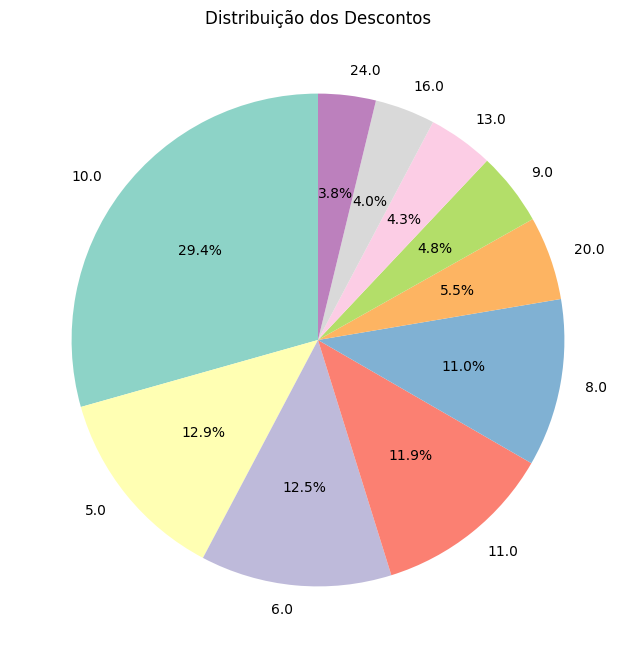

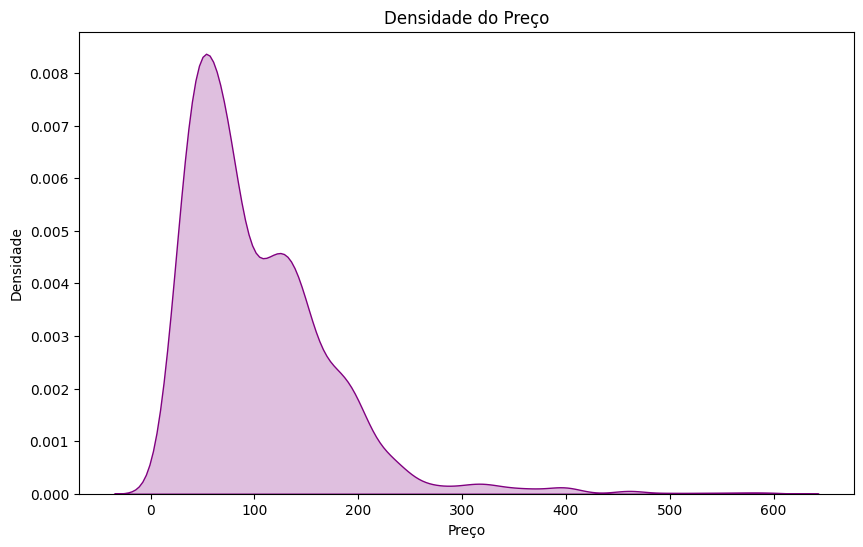

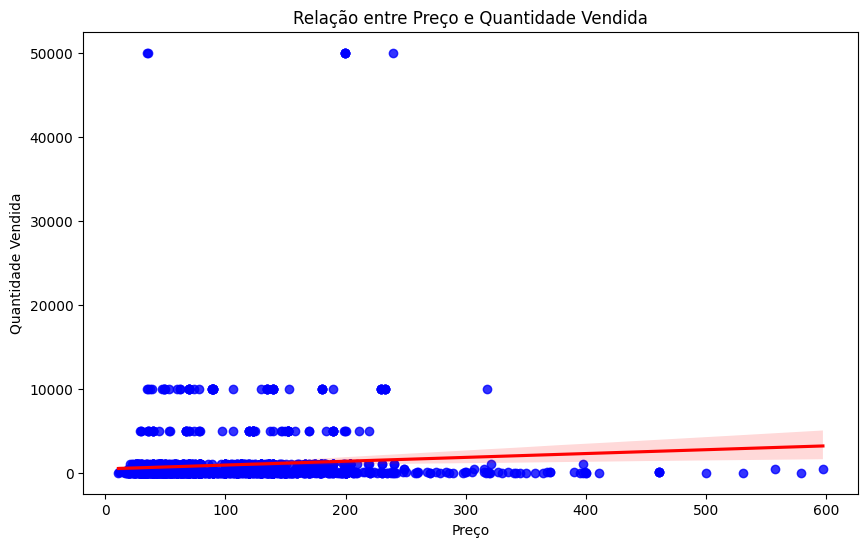

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('ecommerce_preparados.csv')

# Limpar a coluna 'Unnamed: 0' (índice)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Função para limpar e converter colunas numéricas
def clean_column(column):
    """Função para limpar os valores não numéricos em uma coluna"""
    # Remove caracteres não numéricos, como '+' e 'mil', e converte para float
    column = column.replace({'%': '', ',': '', '+': '', 'mil': '', 'R$': ''}, regex=True)
    return pd.to_numeric(column, errors='coerce')

# Limpar e converter colunas numéricas com valores não numéricos
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')
df['N_Avaliações'] = pd.to_numeric(df['N_Avaliações'], errors='coerce')
df['Desconto'] = clean_column(df['Desconto'])  # Remover símbolos e converter
df['Preço'] = clean_column(df['Preço'])  # Remover símbolo de R$ e vírgula
df['Qtd_Vendidos'] = df['Qtd_Vendidos'].replace({'mil': '000'}, regex=True).apply(pd.to_numeric, errors='coerce')  # Remover 'mil' e converter

# 1. Gráfico de Histograma (Distribuição das notas dos produtos)
plt.figure(figsize=(10,6))
sns.histplot(df['Nota'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Notas dos Produtos')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# 2. Gráfico de Dispersão (Preço vs Qtd_Vendidos)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Preço', y='Qtd_Vendidos', data=df, color='green')
plt.title('Preço vs Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.show()

# 3. Mapa de Calor (Correlação entre variáveis numéricas)
corr_matrix = df[['Nota', 'N_Avaliações', 'Desconto', 'Preço', 'Qtd_Vendidos']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()

# 4. Gráfico de Barra (Média de notas por Marca)
df['Marca Abrev'] = df['Marca'].apply(lambda x: x[:7] + '...' if isinstance(x, str) and len(x) > 7 else x)
avg_rating_by_brand = df.groupby('Marca Abrev')['Nota'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_rating_by_brand.plot(kind='bar', color='orange')
plt.title('Média de Notas por Marca')
plt.xlabel('Marca')
plt.ylabel('Média da Nota')
plt.xticks(rotation=45)
plt.show()

# 5. Gráfico de Pizza (Distribuição do Desconto)
discount_dist = df['Desconto'].value_counts().head(10)
plt.figure(figsize=(8,8))
discount_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(discount_dist)))
plt.title('Distribuição dos Descontos')
plt.ylabel('')
plt.show()

# 6. Gráfico de Densidade (Densidade de Preço)
plt.figure(figsize=(10,6))
sns.kdeplot(df['Preço'], fill=True, color='purple')
plt.title('Densidade do Preço')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()

# 7. Gráfico de Regressão (Relação entre Preço e Quantidade Vendida)
plt.figure(figsize=(10,6))
sns.regplot(x='Preço', y='Qtd_Vendidos', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Relação entre Preço e Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.show()

